<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Exploring Global Internet Usage Trends</b></div><div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI data science assistant</a></div></div>

The internet has become an indispensable part of our daily lives, yet its usage varies significantly across the globe. This notebook delves into the world internet usage data for 2023, exploring trends, disparities, and potential insights. If you find this notebook useful, consider giving it an upvote.

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Visualization](#Visualization)
5. [Conclusion and Future Work](#Conclusion-and-Future-Work)

## Introduction
In this notebook, we will analyze the dataset containing information about internet usage rates from various sources such as the World Bank (WB), International Telecommunication Union (ITU), and the Central Intelligence Agency (CIA). Our goal is to uncover patterns and insights that can inform future predictions and strategies for increasing global internet accessibility.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Data Cleaning and Preprocessing
Let's load the data and perform initial cleaning to prepare it for analysis.

In [2]:
# Load the dataset
file_path = '/kaggle/input/world-internet-usage-data-2023-updated/internet_users.csv'
df = pd.read_csv(file_path)
df.head()

,Location,Rate (WB),Year,Rate (ITU),Year.1,Users (CIA),Year.2,Notes
0,World,67.4,2023.0,67.4,2023.0,NaN,NaN,NaN
1,Afghanistan,18.4,2020.0,17.6,2019.0,7020000.0,2020.0,NaN
2,Albania,83.1,2023.0,83.1,2023.0,2291000.0,2021.0,NaN
3,Algeria,71.2,2022.0,71.2,2022.0,31240000.0,2021.0,NaN
4,American Samoa,NaN,NaN,NaN,NaN,18135.0,2021.0,NaN


In [3]:
# Check for missing values
df.isnull().sum()

Location         0
Rate (WB)       29
Year            29
Rate (ITU)      11
Year.1          11
Users (CIA)      6
Year.2           7
Notes          236
dtype: int64

In [4]:
# Drop rows with missing 'Location' as it's essential
df.dropna(subset=['Location'], inplace=True)

# Fill missing numeric values with the median of their respective columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df.head()

,Location,Rate (WB),Year,Rate (ITU),Year.1,Users (CIA),Year.2,Notes
0,World,67.4,2023.0,67.4,2023.0,3077700.0,2021.0,NaN
1,Afghanistan,18.4,2020.0,17.6,2019.0,7020000.0,2020.0,NaN
2,Albania,83.1,2023.0,83.1,2023.0,2291000.0,2021.0,NaN
3,Algeria,71.2,2022.0,71.2,2022.0,31240000.0,2021.0,NaN
4,American Samoa,78.7,2022.0,77.7,2022.0,18135.0,2021.0,NaN


## Exploratory Data Analysis
Let's explore the dataset to understand the distribution of internet usage rates and identify any interesting patterns.

In [5]:
# Summary statistics
df.describe()

,Rate (WB),Year,Rate (ITU),Year.1,Users (CIA),Year.2
count,238.000000,238.000000,238.000000,238.000000,2.380000e+02,238.000000
mean,71.698319,2021.558824,69.002941,2021.037815,2.054835e+07,2021.046218
std,23.626705,1.620903,25.922382,3.494818,8.324456e+07,0.229580
min,10.000000,2016.000000,1.200000,2000.000000,3.700000e+01,2020.000000
25%,61.225000,2022.000000,49.725000,2022.000000,3.738500e+05,2021.000000
50%,78.700000,2022.000000,77.700000,2022.000000,3.077700e+06,2021.000000
75%,89.150000,2022.000000,89.150000,2023.000000,9.460000e+06,2021.000000
max,100.000000,2023.000000,100.000000,2023.000000,1.022000e+09,2022.000000


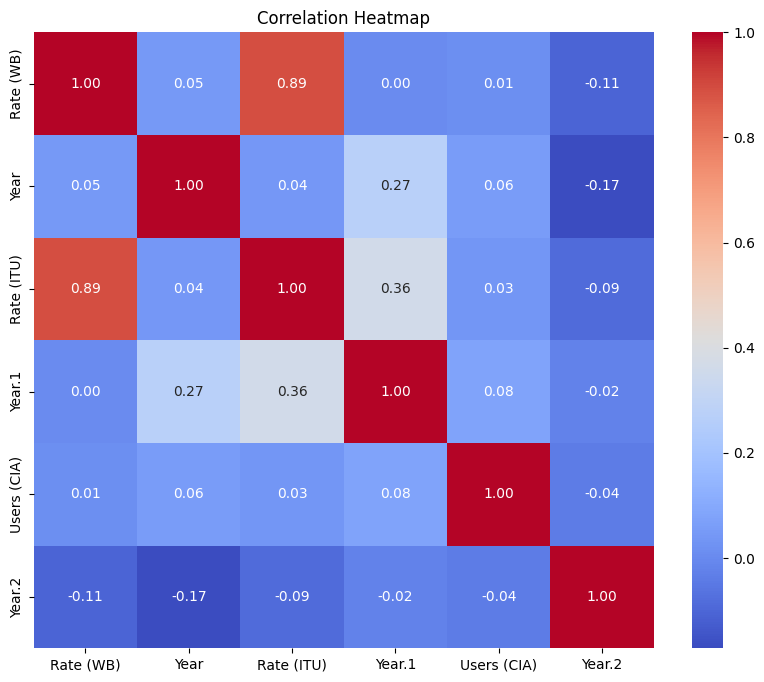

In [6]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Visualization
Visualizations can provide a more intuitive understanding of the data. Let's create some plots to visualize the distribution and relationships within the dataset.

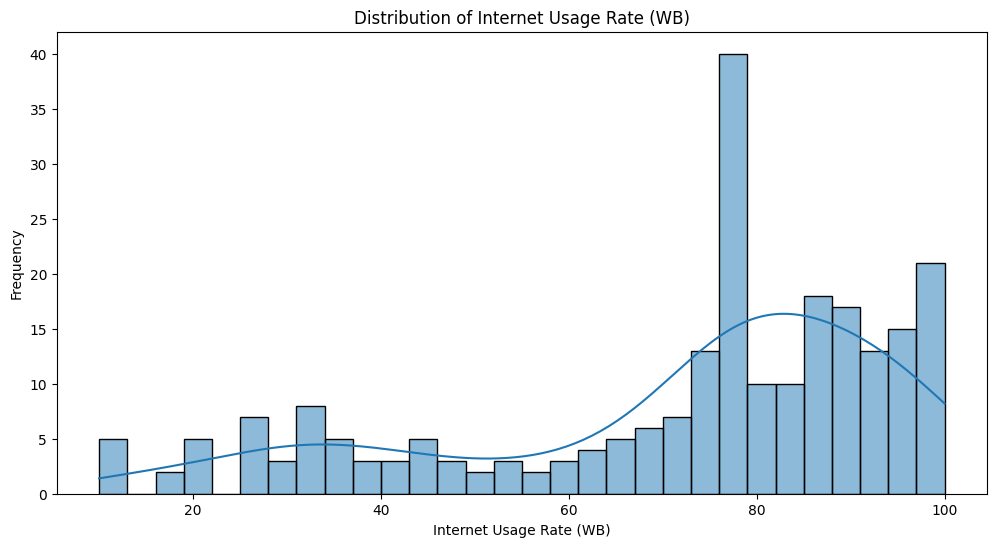

In [7]:
# Histogram of internet usage rates
plt.figure(figsize=(12, 6))
sns.histplot(df['Rate (WB)'], bins=30, kde=True)
plt.title('Distribution of Internet Usage Rate (WB)')
plt.xlabel('Internet Usage Rate (WB)')
plt.ylabel('Frequency')
plt.show()

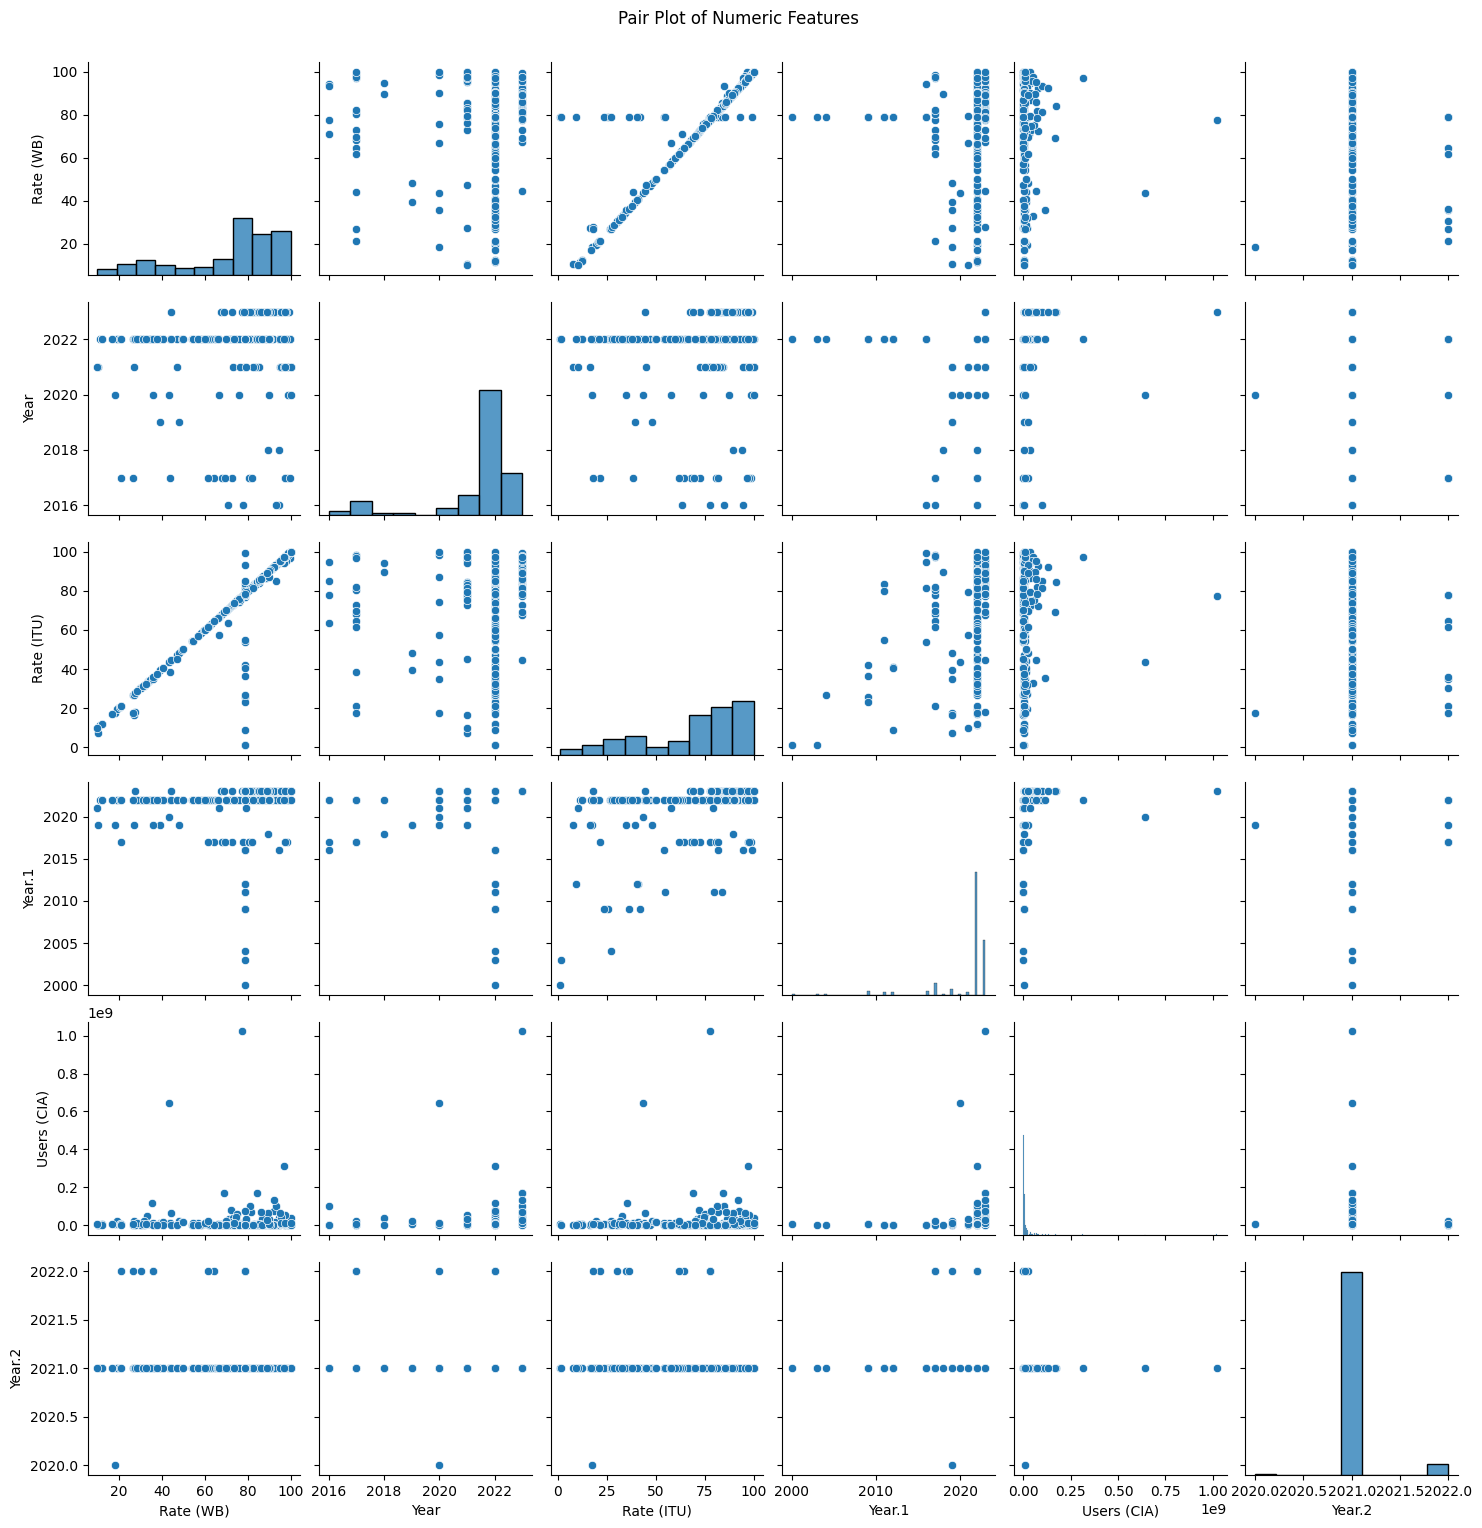

In [8]:
# Pair plot to visualize relationships
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

## Conclusion and Future Work
In this notebook, we explored the global internet usage data for 2023. We cleaned the data, performed exploratory data analysis, and visualized key insights. The correlation heatmap and pair plots provided a deeper understanding of the relationships between different metrics.

For future work, we could develop predictive models to forecast internet usage trends or explore the impact of socio-economic factors on internet accessibility. Additionally, integrating more recent data could enhance the analysis.

If you found this notebook insightful, please consider upvoting it.

## Credits
This notebook was created with the help of [Devra AI data science assistant](https://devra.ai/ref/kaggle)